In [1]:
import pandas as pd
import numpy as np
import bnlearn as bn
from copy import deepcopy

In [2]:
trainval_df = pd.read_pickle('train.pkl').reset_index(drop=True)
        
class_0 = trainval_df[trainval_df['label'] == 0]
class_1 = trainval_df[trainval_df['label'] == 1]
n_samples = len(class_1) 
class_0_downsampled = class_0.sample(n_samples)
df_balanced = pd.concat([class_0_downsampled, class_1])
train_df = df_balanced.reset_index(drop=True)
      
N = len(train_df)
train_df = train_df.sample(frac=1).reset_index(drop=True)
val = train_df[:int(N*0.2)]
train_df = train_df[int(N*0.2):]
train_df.fillna(value=np.pi, inplace=True)
val.fillna(value=np.pi, inplace=True)

In [3]:
# Drop the array column
train_df = train_df.drop("X_cont", axis='columns')
val = val.drop("X_cont", axis='columns')

print(train_df.shape)
print(val.shape)
print(train_df)

(28709, 34)
(7177, 34)
          Unit1  Gender  HospAdmTime       Age       DBP      Temp   Glucose  \
7177   1.000000     0.0     0.341381  1.643059  3.141593 -0.476357 -0.837602   
7178   0.000000     0.0     0.325056  0.937559 -0.812653  0.028842 -0.447187   
7179   0.000000     1.0    -0.086984  1.161344 -0.705329  0.028842  0.236041   
7180   3.141593     0.0     0.341441  1.553423  1.512705  0.896749 -0.349583   
7181   3.141593     0.0     0.006609 -0.424049 -0.419131 -0.618849  0.177479   
...         ...     ...          ...       ...       ...       ...       ...   
35881  1.000000     1.0    -0.439169 -0.911862  0.511012 -1.266541  0.763102   
35882  3.141593     1.0     0.341320 -0.327706 -0.705329  0.534042  0.177479   
35883  3.141593     1.0    -2.599133 -0.363072 -0.848428  1.971917 -0.232458   
35884  3.141593     0.0    -0.186866  1.236955  0.189040  1.104010 -0.193416   
35885  0.000000     1.0     0.329349 -1.094792 -0.848428 -0.618849 -0.876644   

       Potassium

In [4]:
### Discretize Continuous Data ###

# Get the continuous variables
cont_cols = np.array(train_df.columns).tolist()
cont_cols.remove("Unit1")
cont_cols.remove("Gender")
cont_cols.remove("label")
print(cont_cols)

# Make arbitrary edges for discretization
edges = []
for var in cont_cols:
    edges.append(("label", var))

# Discretize continuous variables
train_df_discrete = train_df
"""
train_df_discrete = bn.discretize(train_df, edges, cont_cols, max_iterations=1)
print(train_df_discrete)
val_discrete = bn.discretize(val, edges, cont_cols, max_iterations=1)
print(val_discrete)
"""

['HospAdmTime', 'Age', 'DBP', 'Temp', 'Glucose', 'Potassium', 'Hct', 'FiO2', 'Hgb', 'pH', 'BUN', 'WBC', 'Magnesium', 'Creatinine', 'Platelets', 'Calcium', 'PaCO2', 'BaseExcess', 'Chloride', 'HCO3', 'Phosphate', 'EtCO2', 'SaO2', 'PTT', 'Lactate', 'AST', 'Alkalinephos', 'Bilirubin_total', 'TroponinI', 'Fibrinogen', 'Bilirubin_direct']


'\ntrain_df_discrete = bn.discretize(train_df, edges, cont_cols, max_iterations=1)\nprint(train_df_discrete)\nval_discrete = bn.discretize(val, edges, cont_cols, max_iterations=1)\nprint(val_discrete)\n'

In [5]:
train_df_discrete.head()

,Unit1,Gender,HospAdmTime,Age,DBP,Temp,Glucose,Potassium,Hct,FiO2,...,SaO2,PTT,Lactate,AST,Alkalinephos,Bilirubin_total,TroponinI,Fibrinogen,Bilirubin_direct,label
7177,1.000000,0.0,0.341381,1.643059,3.141593,-0.476357,-0.837602,-0.836049,0.660125,-0.004900,...,3.141593,-0.271373,3.141593,3.141593,3.141593,3.141593,3.141593,3.141593,3.141593,0
7178,0.000000,0.0,0.325056,0.937559,-0.812653,0.028842,-0.447187,0.100402,-0.160179,-0.004900,...,-1.618095,-0.480896,3.141593,3.141593,3.141593,3.141593,3.141593,3.141593,3.141593,0
7179,0.000000,1.0,-0.086984,1.161344,-0.705329,0.028842,0.236041,-0.352216,0.167942,-0.016546,...,0.260960,-0.572324,-0.430119,3.141593,3.141593,3.141593,3.141593,-0.474187,3.141593,0
7180,3.141593,0.0,0.341441,1.553423,1.512705,0.896749,-0.349583,-0.523899,-0.433614,-0.004900,...,0.306790,-0.412325,-0.374643,0.721219,-0.165945,-0.280408,3.141593,0.380906,3.141593,1
7181,3.141593,0.0,0.006609,-0.424049,-0.419131,-0.618849,0.177479,-0.523899,-0.251324,3.141593,...,3.141593,3.141593,3.141593,3.141593,3.141593,3.141593,-0.322905,3.141593,3.141593,0


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


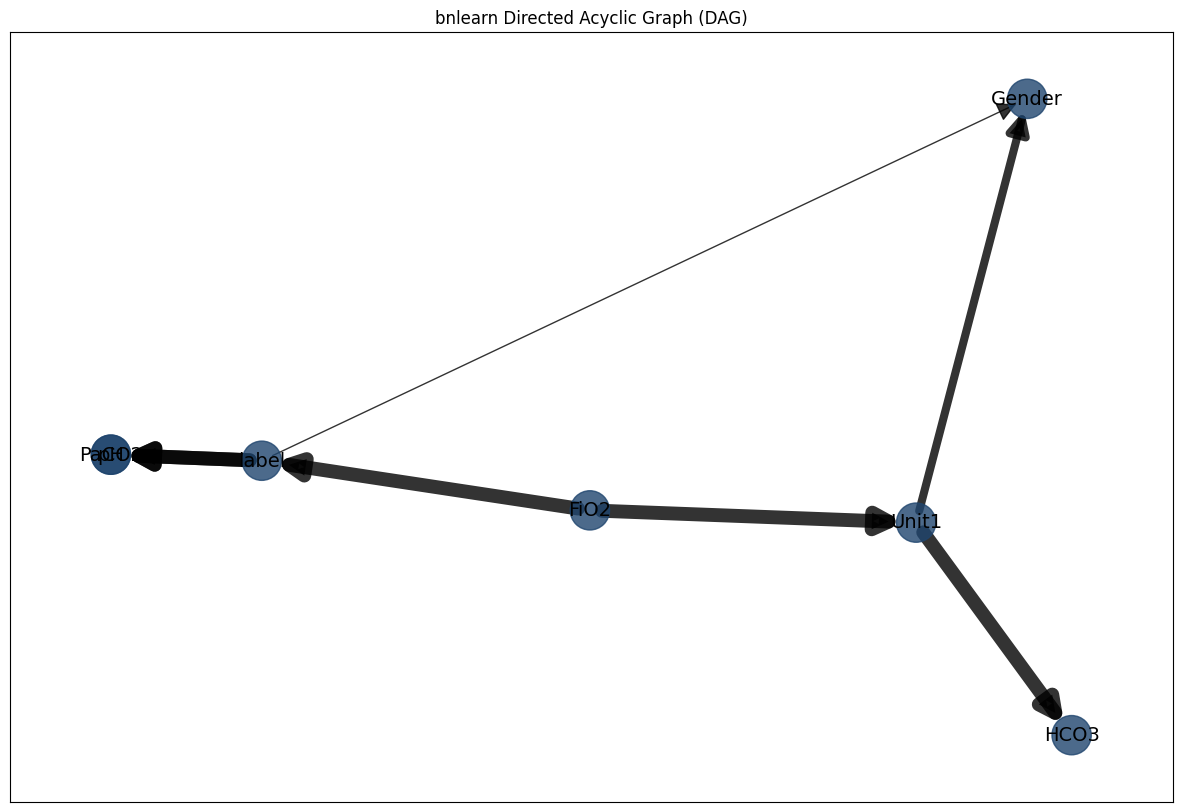

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Unit1': array([ 0.40223109, -0.16556664]),
  'Gender': array([0.53684917, 1.        ]),
  'HCO3': array([ 0.59060584, -0.75008497]),
  'label': array([-0.39036824,  0.0047133 ]),
  'PaCO2': array([-0.57318733,  0.0213532 ]),
  'pH': array([-0.57318733,  0.0213532 ]),
  'FiO2': array([ 0.00705681, -0.1317681 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f0033c13010>,
 'node_properties': {'Unit1': {'node_color': '#1f456e', 'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'HospAdmTime': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'DBP': {'node_color': '#1f456e', 'node_size': 800},
  'Temp': {'node_color': '#1f456e', 'node_size': 800},
  'Glucose': {'node_color': '#1f456e', 'node_size': 800},
  'Potassium': {'node_color': '#1f456e', 'node_size': 800},
  'Hct': {'node_color': '#1f456e', 'node_size': 800}

In [6]:
### Structure Learning ###

# Learn the structure
bn_model = bn.structure_learning.fit(train_df_discrete, methodtype='hc', scoretype='bic')
# Independence test
bn_model = bn.independence_test(bn_model, train_df, prune=True)
# Make plot
bn.plot(bn_model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Unit1:
+--------------------------+-----+-------------------------+
| FiO2                     | ... | FiO2(3.141592653589793) |
+--------------------------+-----+-------------------------+
| Unit1(0.0)               | ... | 0.1920353331263033      |
+--------------------------+-----+-------------------------+
| Unit1(1.0)               | ... | 0.38716114293601145     |
+--------------------------+-----+-------------------------+
| Unit1(3.141592653589793) | ... | 0.4208035239376852      |
+--------------------------+-----+-------------------------+
[bnlearn] >CPD of Gender:
+-------------+--------------------+-----+--------------------------+
| Unit1       | Unit1(0.0)         | ... | Unit1(3.141592653589793) |
+-------------+--------------------+-----+------------------------

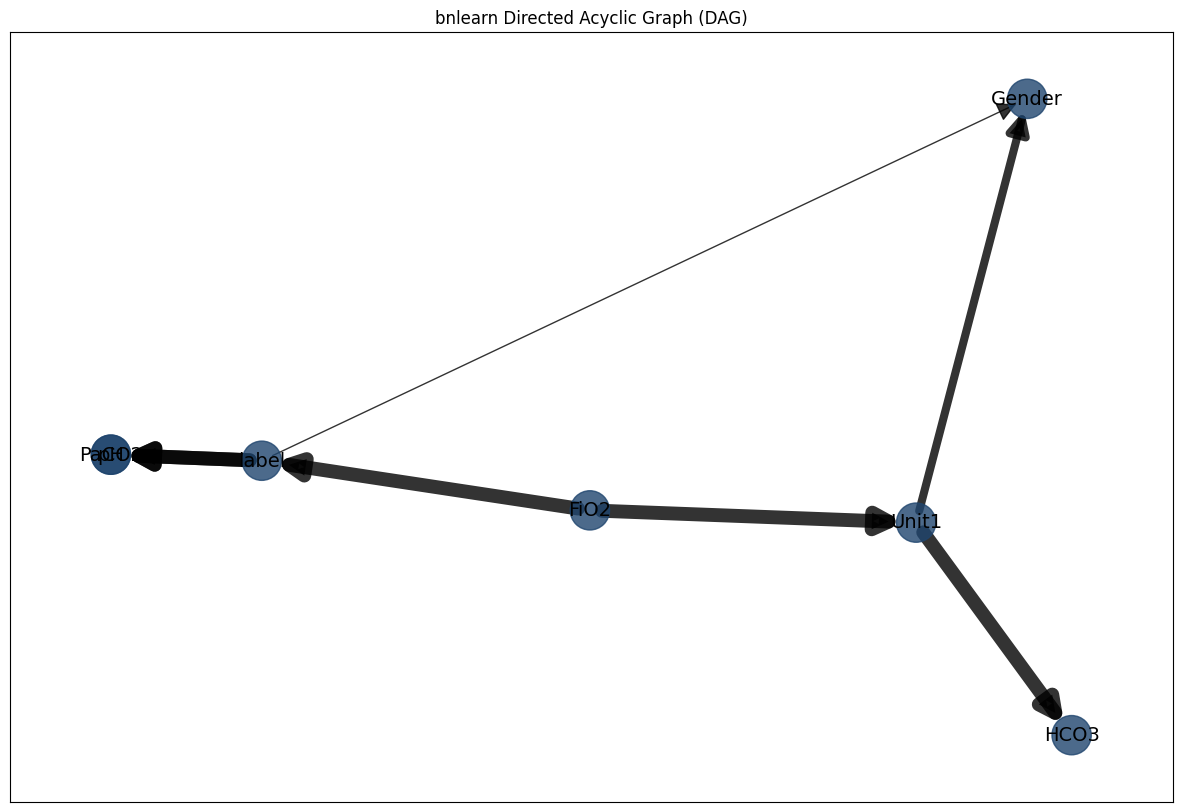

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Unit1': array([ 0.40223109, -0.16556664]),
  'Gender': array([0.53684917, 1.        ]),
  'HCO3': array([ 0.59060584, -0.75008497]),
  'label': array([-0.39036824,  0.0047133 ]),
  'PaCO2': array([-0.57318733,  0.0213532 ]),
  'pH': array([-0.57318733,  0.0213532 ]),
  'FiO2': array([ 0.00705681, -0.1317681 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f00441b1570>,
 'node_properties': {'Unit1': {'node_color': '#1f456e', 'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'HospAdmTime': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'DBP': {'node_color': '#1f456e', 'node_size': 800},
  'Temp': {'node_color': '#1f456e', 'node_size': 800},
  'Glucose': {'node_color': '#1f456e', 'node_size': 800},
  'Potassium': {'node_color': '#1f456e', 'node_size': 800},
  'Hct': {'node_color': '#1f456e', 'node_size': 800}

In [7]:
### Parameter Learning ###

bn_model = bn.parameter_learning.fit(bn_model, train_df_discrete)
# Independence test
bn_model = bn.independence_test(bn_model, train_df, prune=True)
# Make plot
bn.plot(bn_model)

In [42]:
### Predict ###

# Remove columns not included in the graph
val_final = deepcopy(val)
for col in val_final.columns:
    col_in_graph = False
    if col == 'label':
        continue
    for edge in bn_model["model_edges"]:
        if edge[0] == col or edge[1] == col:
            col_in_graph = True
            break
    if not col_in_graph:
        val_final = val_final.drop(col, axis='columns')

val_final = val_final.iloc[191:]
print(val_final)

pred = bn.predict(bn_model, val_final, variables=['label'])
print(pred)

         Unit1  Gender      FiO2        pH     PaCO2      HCO3  label
191   3.141593     0.0 -0.017378  0.954904 -1.076549 -0.922458      1
192   0.000000     0.0  3.141593  3.141593  3.141593  3.141593      0
193   3.141593     1.0 -0.013219  0.553114 -0.000817  0.445700      1
194   3.141593     1.0 -0.004900  0.954904  0.429476  1.357805      1
195   3.141593     1.0 -0.013219  0.620079 -0.484896 -0.238379      1
...        ...     ...       ...       ...       ...       ...    ...
7172  3.141593     1.0  3.141593  3.141593  3.141593  3.141593      0
7173  1.000000     1.0  3.141593  3.141593  3.141593  0.673726      1
7174  0.000000     0.0 -0.023201 -0.786187  0.429476  3.141593      0
7175  1.000000     0.0  3.141593  3.141593  3.141593  3.141593      0
7176  1.000000     1.0  0.003418 -0.518326  1.827927  3.141593      0

[6986 rows x 7 columns]
[bnlearn]> Remaining columns for inference: 6


  8%|▊         | 299/3836 [00:00<00:05, 591.55it/s]


KeyError: -4.114826083551244

Unit1     1.000000
Gender    1.000000
FiO2      3.141593
pH        3.141593
PaCO2     3.141593
HCO3      3.141593
label     0.000000
Name: 190, dtype: float64
